In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense

In [64]:
df = pd.read_csv('../Data/Language Detection.csv')

In [65]:
df.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [66]:
df.tail()

,Text,Language
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada
10336,ಟೆರ್ರಿ ನೀವು ನಿಜವಾಗಿಯೂ ಆ ದೇವದೂತನಂತೆ ಸ್ವಲ್ಪ ಕಾಣು...,Kannada


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10337 entries, 0 to 10336
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      10337 non-null  object
 1   Language  10337 non-null  object
dtypes: object(2)
memory usage: 161.6+ KB


In [68]:
df.shape

(10337, 2)

In [69]:
df.columns

Index(['Text', 'Language'], dtype='object')

The dataset contains 10,337 rows with two columns: "text" and "language." Both columns have a data type of "object." The "text" column likely contains textual data, while the "language" column may store information about the language of the corresponding text. 

In [70]:
df.duplicated().sum()

66

In [71]:
df.drop_duplicates(inplace=True)

In [72]:
df.duplicated().sum()

0

 It was discovered that there were 66 rows with duplicate data. To address this issue, the decision was made to remove these duplicate rows, resulting in a refined dataset with 10,271 rows. 

In [73]:
df.sample(6)

,Text,Language
5102,Mientras que las inexactitudes de contenido y ...,Spanish
683,"On September 28, 2007, Italian politician Fran...",English
9245,إذا لم تكن قد ضغطت بالفعل على زر الاشتراك ورمز...,Arabic
4129,"Honnêtement, je ne pense pas que ça va marcher.",French
5037,"[150]​[151]​ A diciembre de 2009, había 300 en...",Spanish
4872,[51]​ Este nombre se pronuncia en inglés como ...,Spanish


In [74]:
df.isnull().sum()

Text        0
Language    0
dtype: int64

 it does not contain any null or missing values. This indicates that the dataset is complete and does not have any missing data.

In [75]:
df['Language'].value_counts(normalize= True) * 100

English       13.455360
French         9.804303
Spanish        7.944699
Portugeese     7.165807
Italian        6.756888
Russian        6.698471
Sweedish       6.552429
Malayalam      5.754065
Dutch          5.276993
Arabic         5.179632
Turkish        4.585727
German         4.527310
Tamil          4.517574
Danish         4.128128
Kannada        3.563431
Greek          3.485542
Hindi          0.603641
Name: Language, dtype: float64

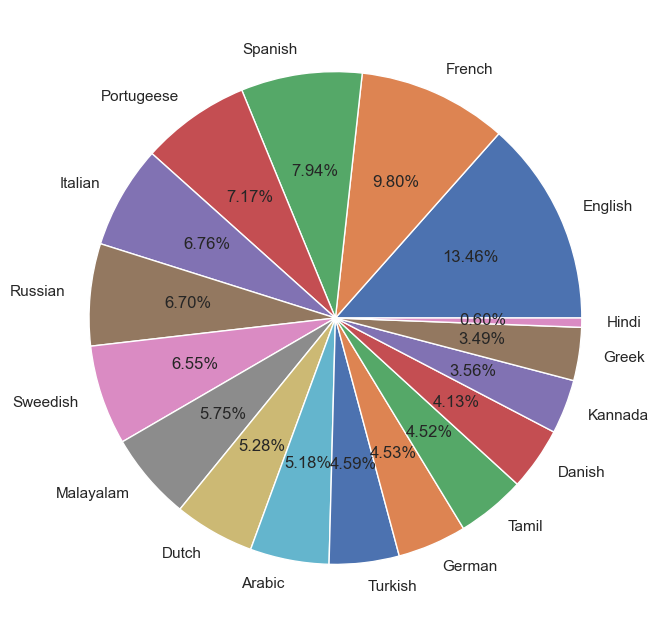

In [76]:
sns.set()
plt.figure(figsize= (8, 8))
plt.pie(x = df['Language'].value_counts(), labels= df['Language'].value_counts().index, autopct= '%1.2f%%')
plt.show()

In [77]:
le = LabelEncoder()
le.fit(df['Language'])

LabelEncoder()

In [78]:
df['Language'] = le.transform(df['Language'])
df['Language']

0        3
1        3
2        3
3        3
4        3
        ..
10332    9
10333    9
10334    9
10335    9
10336    9
Name: Language, Length: 10271, dtype: int32

In [84]:
df['Language'].value_counts(normalize=True) * 100

3     13.455360
4      9.804303
13     7.944699
11     7.165807
8      6.756888
12     6.698471
14     6.552429
10     5.754065
2      5.276993
0      5.179632
16     4.585727
5      4.527310
15     4.517574
1      4.128128
9      3.563431
6      3.485542
7      0.603641
Name: Language, dtype: float64

In [85]:
X = df['Text'].values.flatten()
y = to_categorical(df['Language'])

In [86]:
X[5]

'[2] In ancient philosophy, natura is mostly used as the Latin translation of the Greek word physis (φύσις), which originally related to the intrinsic characteristics that plants, animals, and other features of the world develop of their own accord.'

In [87]:
y[1]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [90]:
for i in range(len(tuple(X))):
    pass